In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy import stats
from scipy.stats import norm


warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/sample_data/train.csv")

NameError: name 'pd' is not defined

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


## Exploratory Data Analysis

<Axes: xlabel='Purchase', ylabel='Density'>

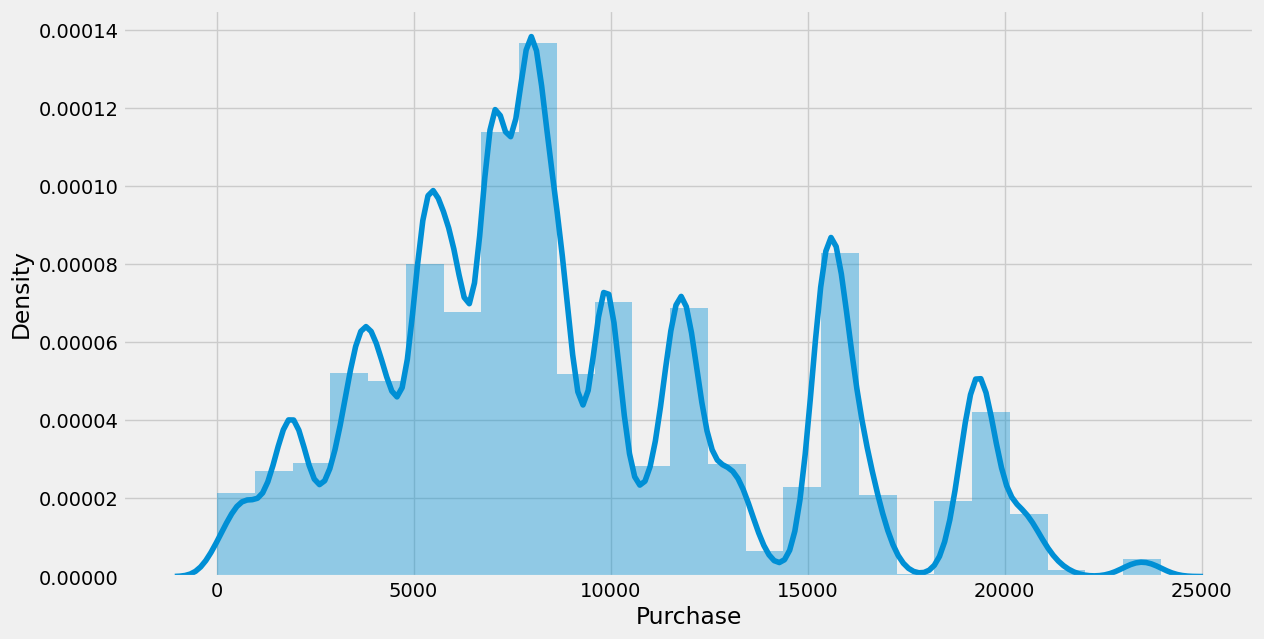

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13, 7))
sns.distplot(df['Purchase'], bins=25)

### Gender

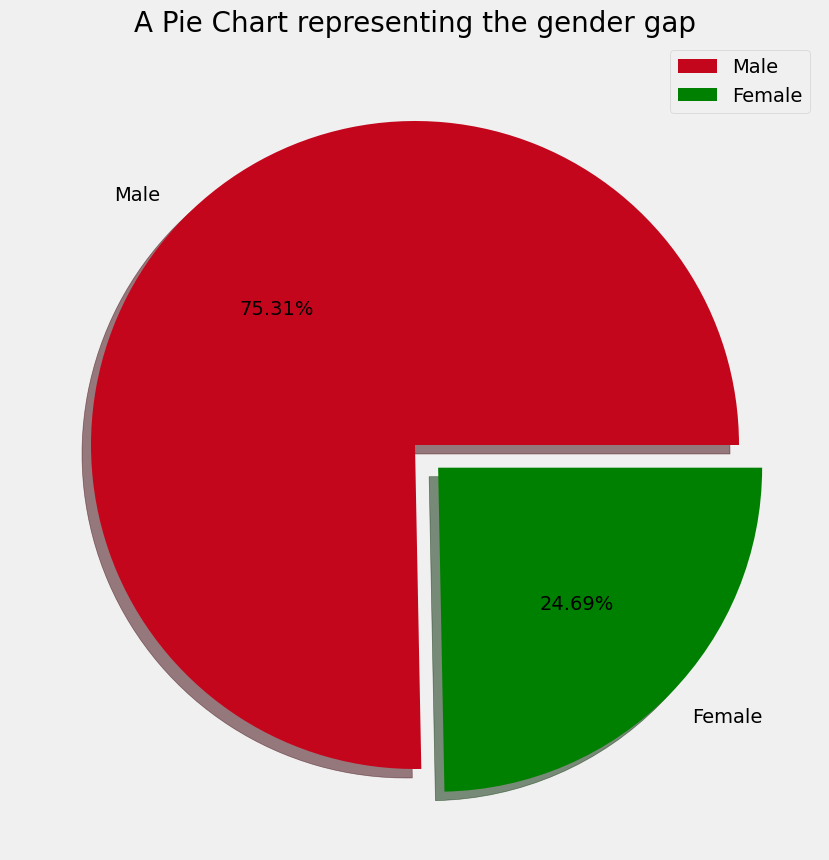

In [ ]:
size = df['Gender'].value_counts()
labels = ['Male', 'Female']
colors = ['#C4061D', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Gender per transaction')

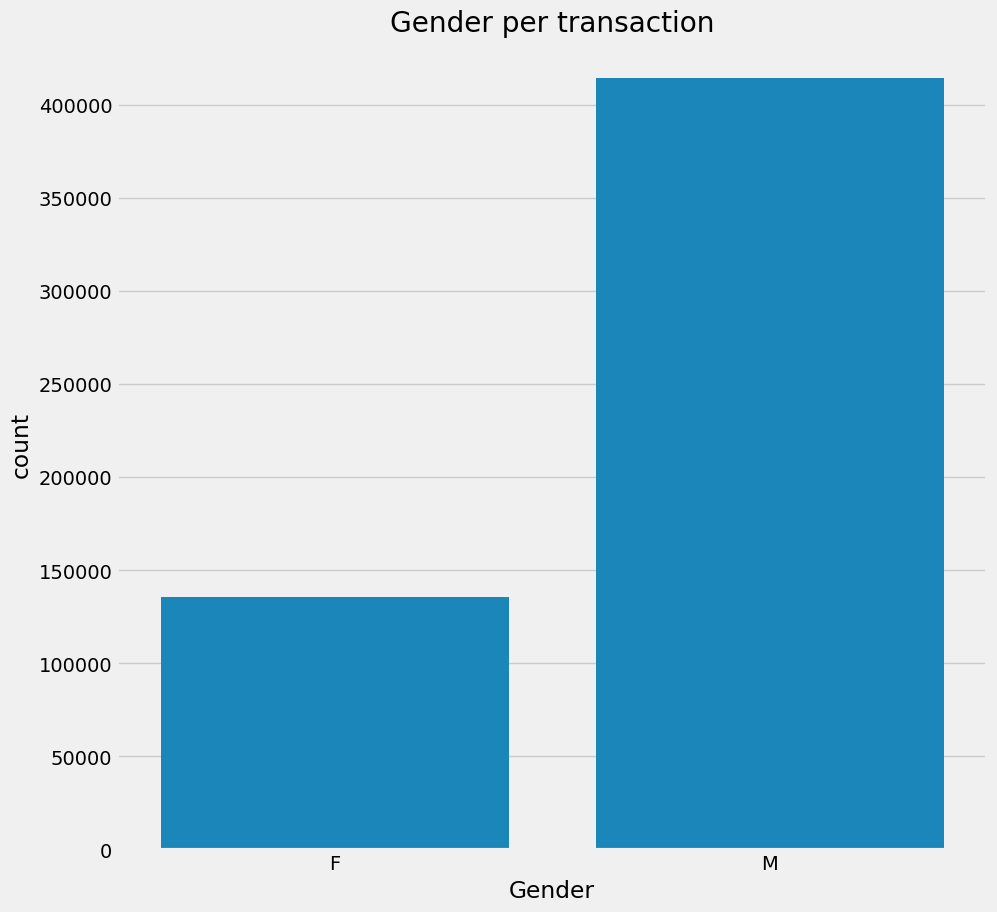

In [ ]:
sns.countplot(x=df['Gender'])
plt.title('Gender per transaction')

### Age

Text(0.5, 1.0, 'Age per transaction')

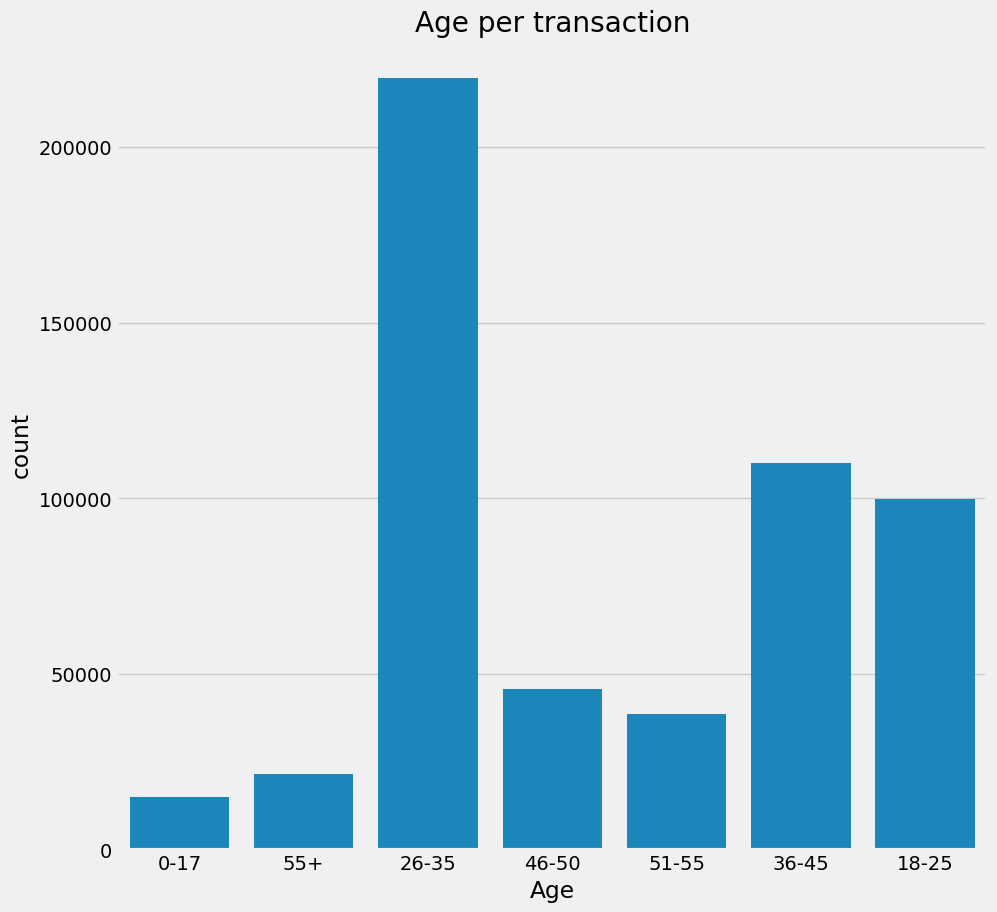

In [ ]:
sns.countplot(x=df['Age'])
plt.title('Age per transaction')

<Axes: xlabel='Age'>

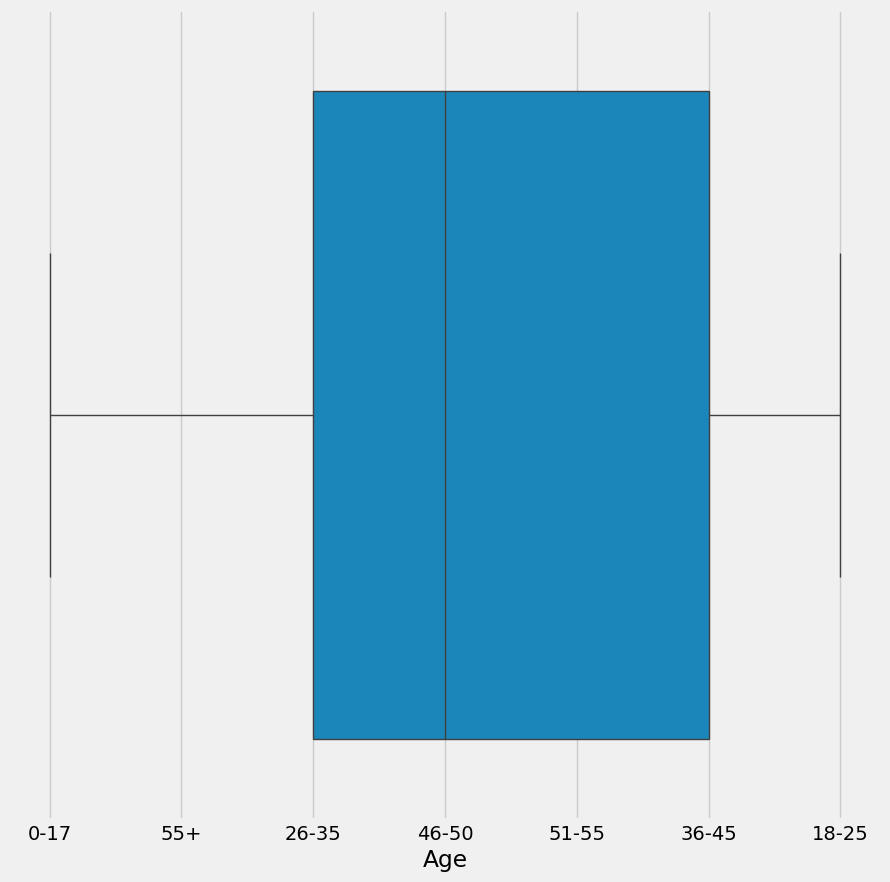

In [ ]:
sns.boxplot(x=df['Age'])

### Marital status

<Axes: xlabel='Marital_Status', ylabel='count'>

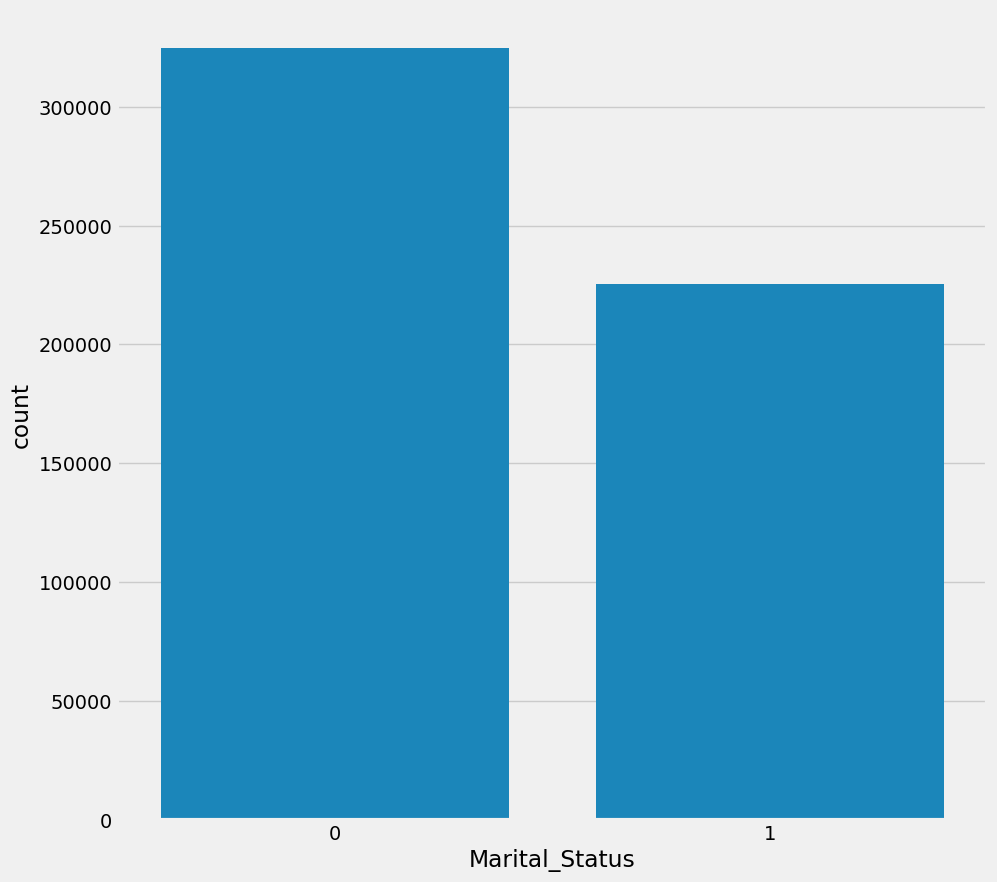

In [ ]:
sns.countplot(x=df['Marital_Status'])

<Axes: xlabel='Occupation', ylabel='count'>

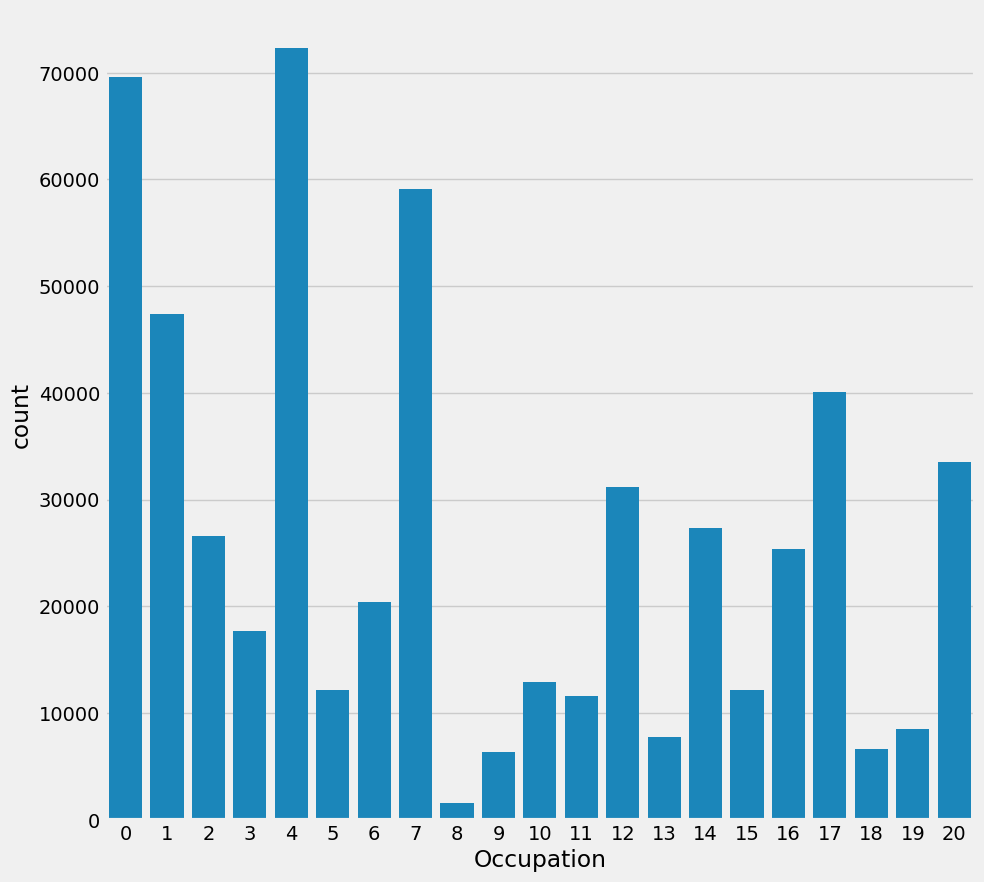

In [ ]:
sns.countplot(x=df['Occupation'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

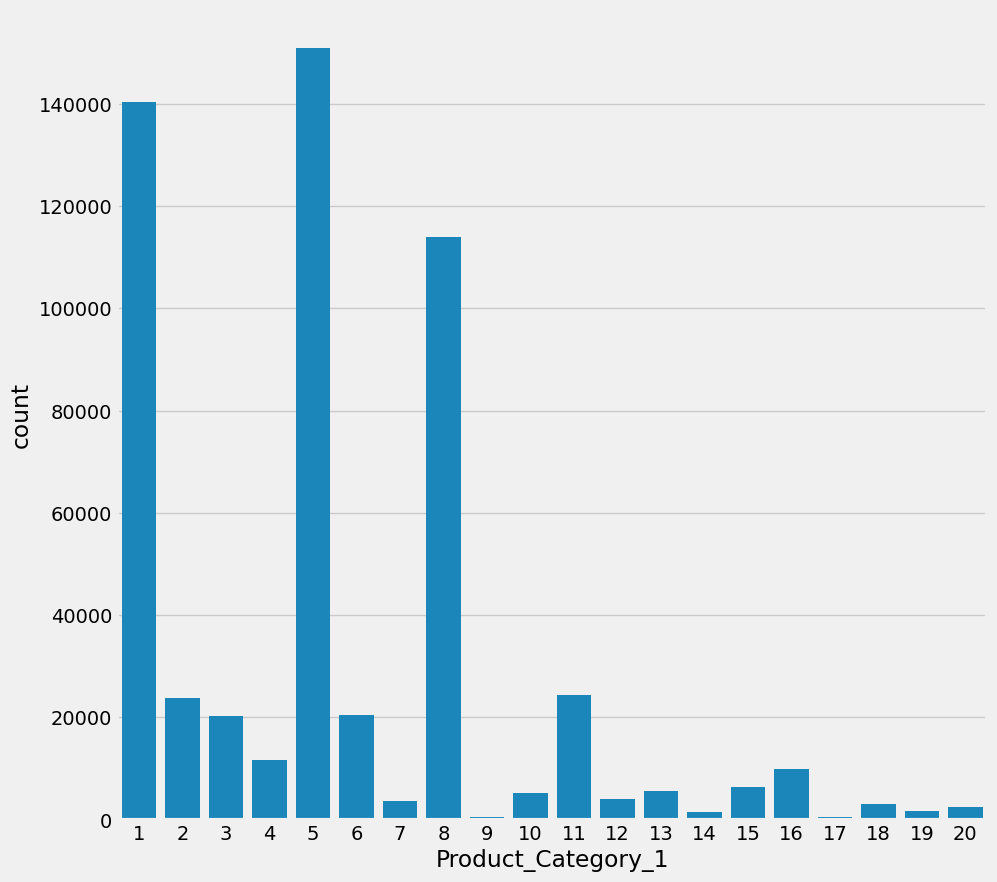

In [ ]:
sns.countplot(x=df['Product_Category_1'])

<Axes: xlabel='Product_Category_2', ylabel='count'>

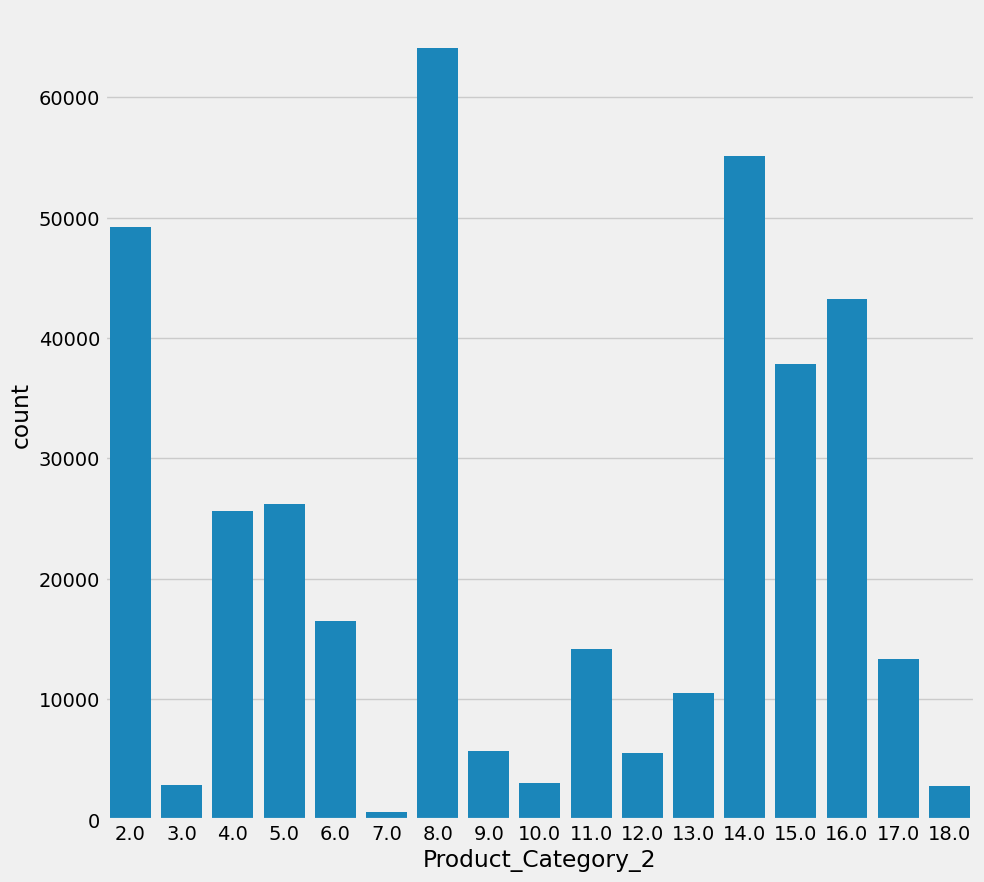

In [ ]:
sns.countplot(x=df['Product_Category_2'])

<Axes: xlabel='Product_Category_3', ylabel='count'>

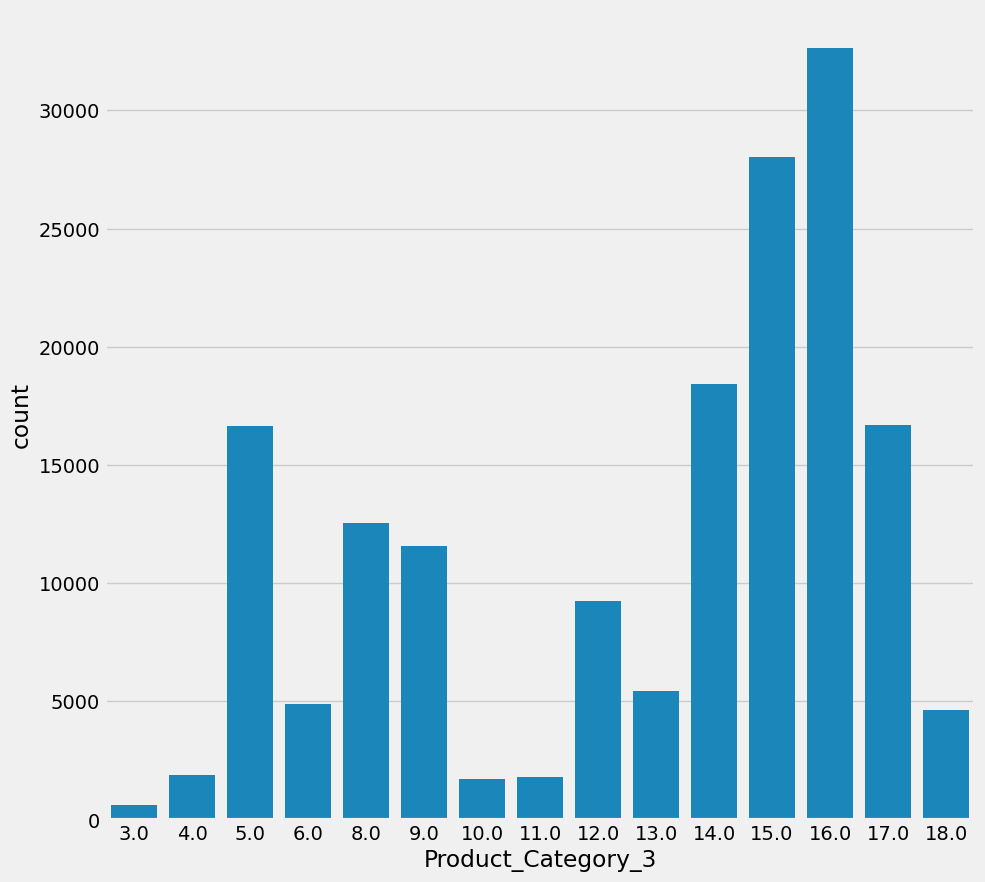

In [ ]:
sns.countplot(x=df['Product_Category_3'])

<Axes: xlabel='City_Category', ylabel='count'>

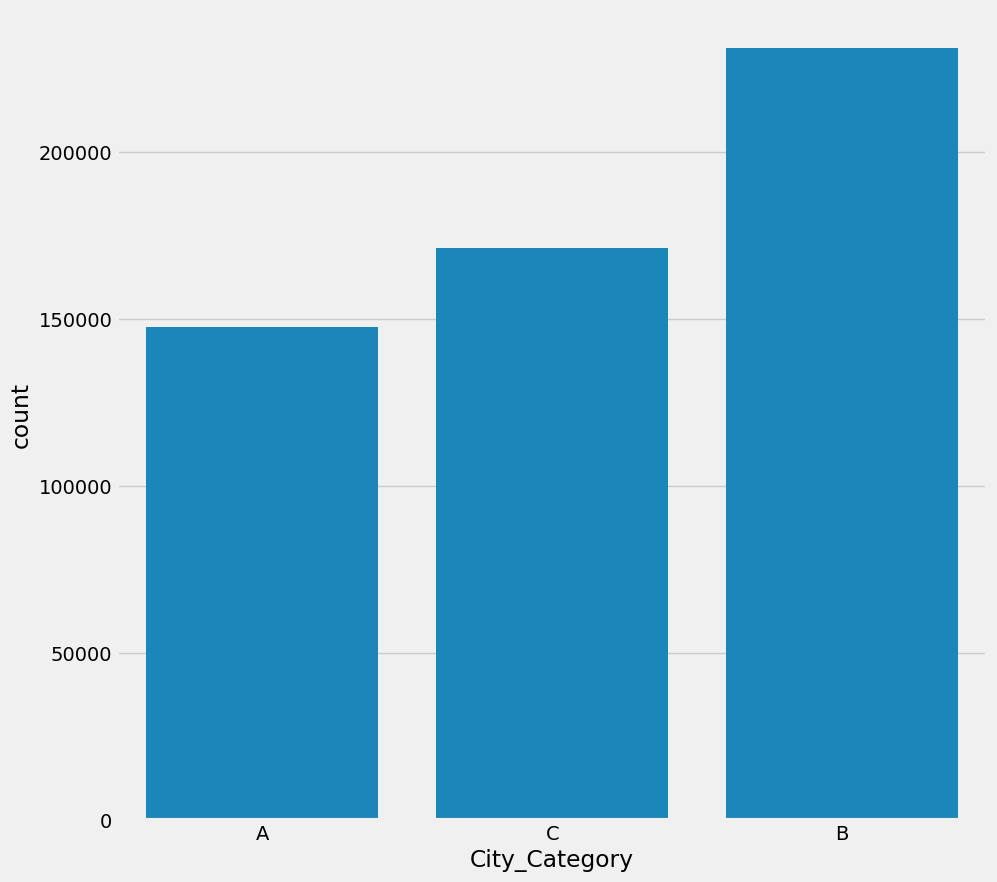

In [ ]:
sns.countplot(x=df['City_Category'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

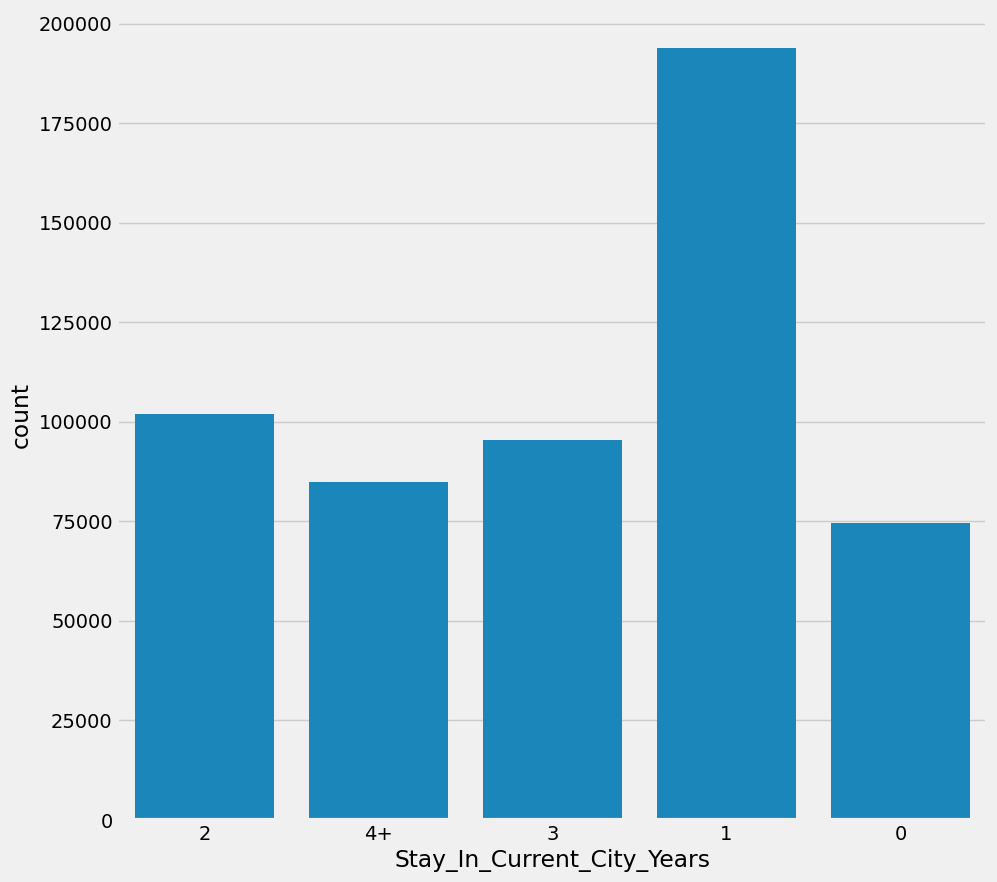

In [ ]:
sns.countplot(x=df['Stay_In_Current_City_Years'])

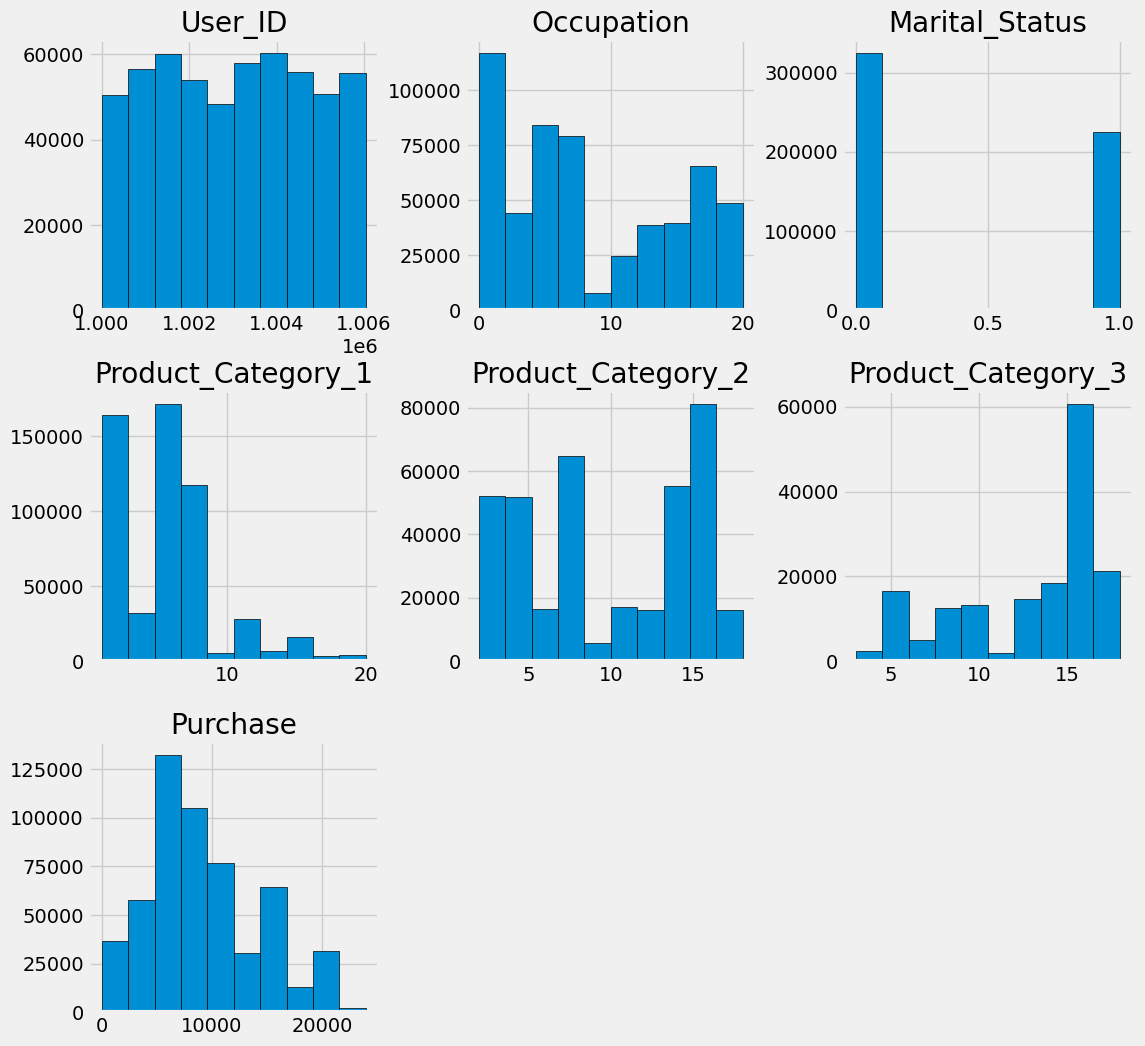

In [ ]:
df.hist(edgecolor='black',figsize=(12,12));

In [ ]:
missing_values = df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

value = {
    'missing_values': missing_values,
    'percent_missing': percent_missing
}

missing_data = pd.DataFrame(value, columns=['missing_values', 'percent_missing'])
missing_data

,missing_values,percent_missing
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,173638,31.566643


In [ ]:
median = df['Product_Category_2'].median()
df['Product_Category_2'].fillna(median, inplace=True)

In [ ]:
df.drop('Product_Category_3', axis=1, inplace=True)

In [ ]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,9.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,9.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,9.0,7969


In [ ]:
df = df[df['Purchase'].notna()]

The mu 9263.968712959126 and Sigma 5023.060827959928 for the curve


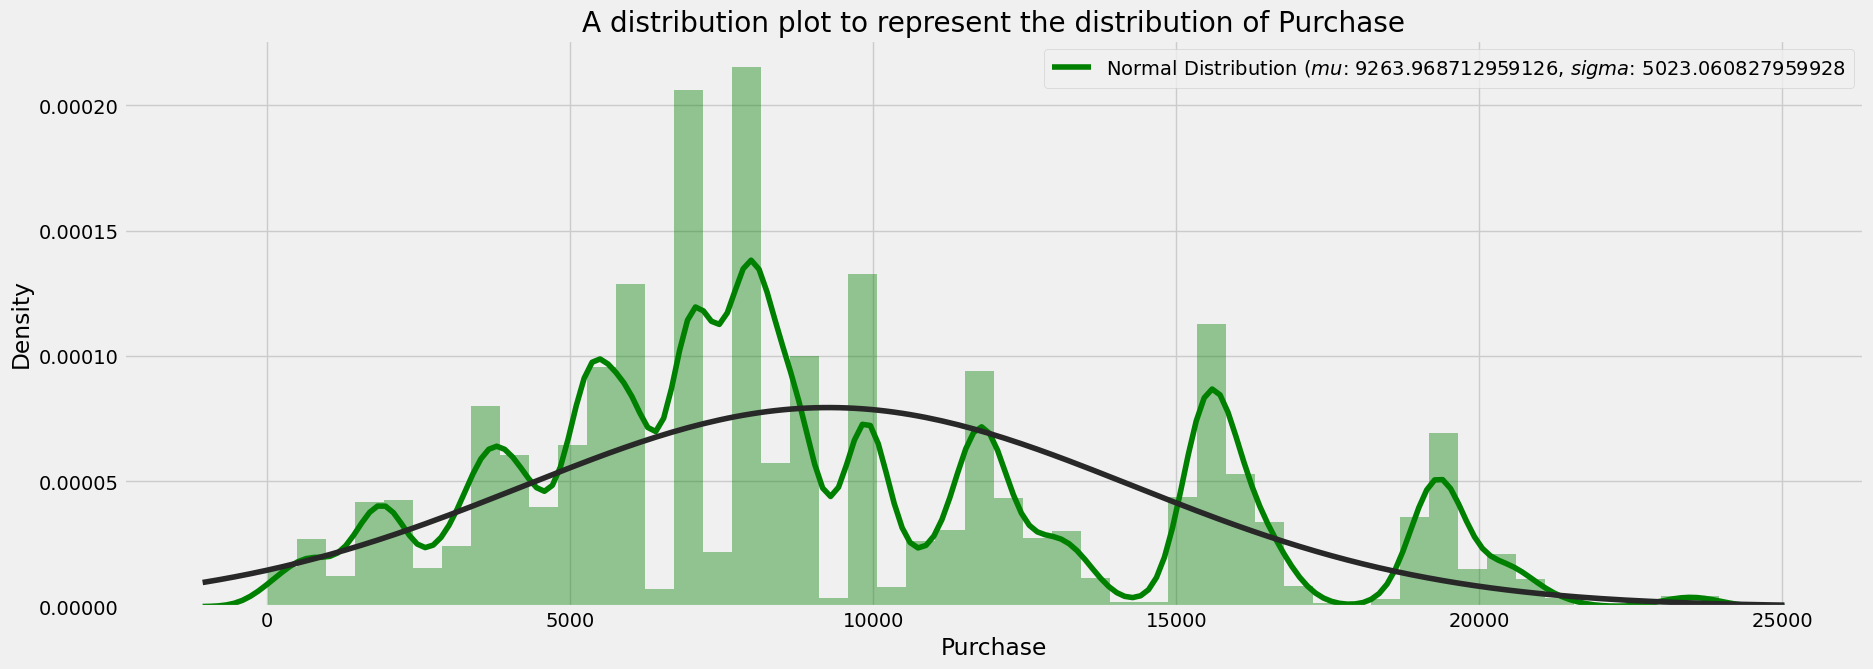

In [ ]:
plt.rcParams['figure.figsize'] = (20, 7)
sns.distplot(df['Purchase'], color = 'green', fit = norm)

mu, sigma = norm.fit(df['Purchase'])
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

In [ ]:
df = df.drop(['User_ID', 'Product_ID'], axis=1)

In [ ]:
df_Gender = pd.get_dummies(df['Gender'])
df_Age = pd.get_dummies(df['Age'])
df_City_Category = pd.get_dummies(df['City_Category'])
df_Stay_In_Current_City_Years = pd.get_dummies(df['Stay_In_Current_City_Years'])

data_final= pd.concat([df, df_Gender, df_Age, df_City_Category, df_Stay_In_Current_City_Years], axis=1)

data_final.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,F,...,51-55,55+,A,B,C,0,1,2,3,4+
0,F,0-17,10,A,2,0,3,9.0,8370,True,...,False,False,True,False,False,False,False,True,False,False
1,F,0-17,10,A,2,0,1,6.0,15200,True,...,False,False,True,False,False,False,False,True,False,False
2,F,0-17,10,A,2,0,12,9.0,1422,True,...,False,False,True,False,False,False,False,True,False,False
3,F,0-17,10,A,2,0,12,14.0,1057,True,...,False,False,True,False,False,False,False,True,False,False
4,M,55+,16,C,4+,0,8,9.0,7969,False,...,False,True,False,False,True,False,False,False,False,True


In [ ]:
data_final = data_final.drop(['Gender','Age','City_Category','Stay_In_Current_City_Years'],axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

X = data_final.drop(['Purchase'], axis=1)
y = data_final['Purchase']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)
    model.fit(x_train, y_train)

    # predict the results
    pred = model.predict(x_test)

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))

    print("Results")
    print("MSE:", np.sqrt(mean_squared_error(y_test, pred)))
    print("CV Score:", np.sqrt(cv_score))


Results
MSE: 4689.883226574885
CV Score: 4695.578379961406


<Axes: title={'center': 'Model Coefficients'}>

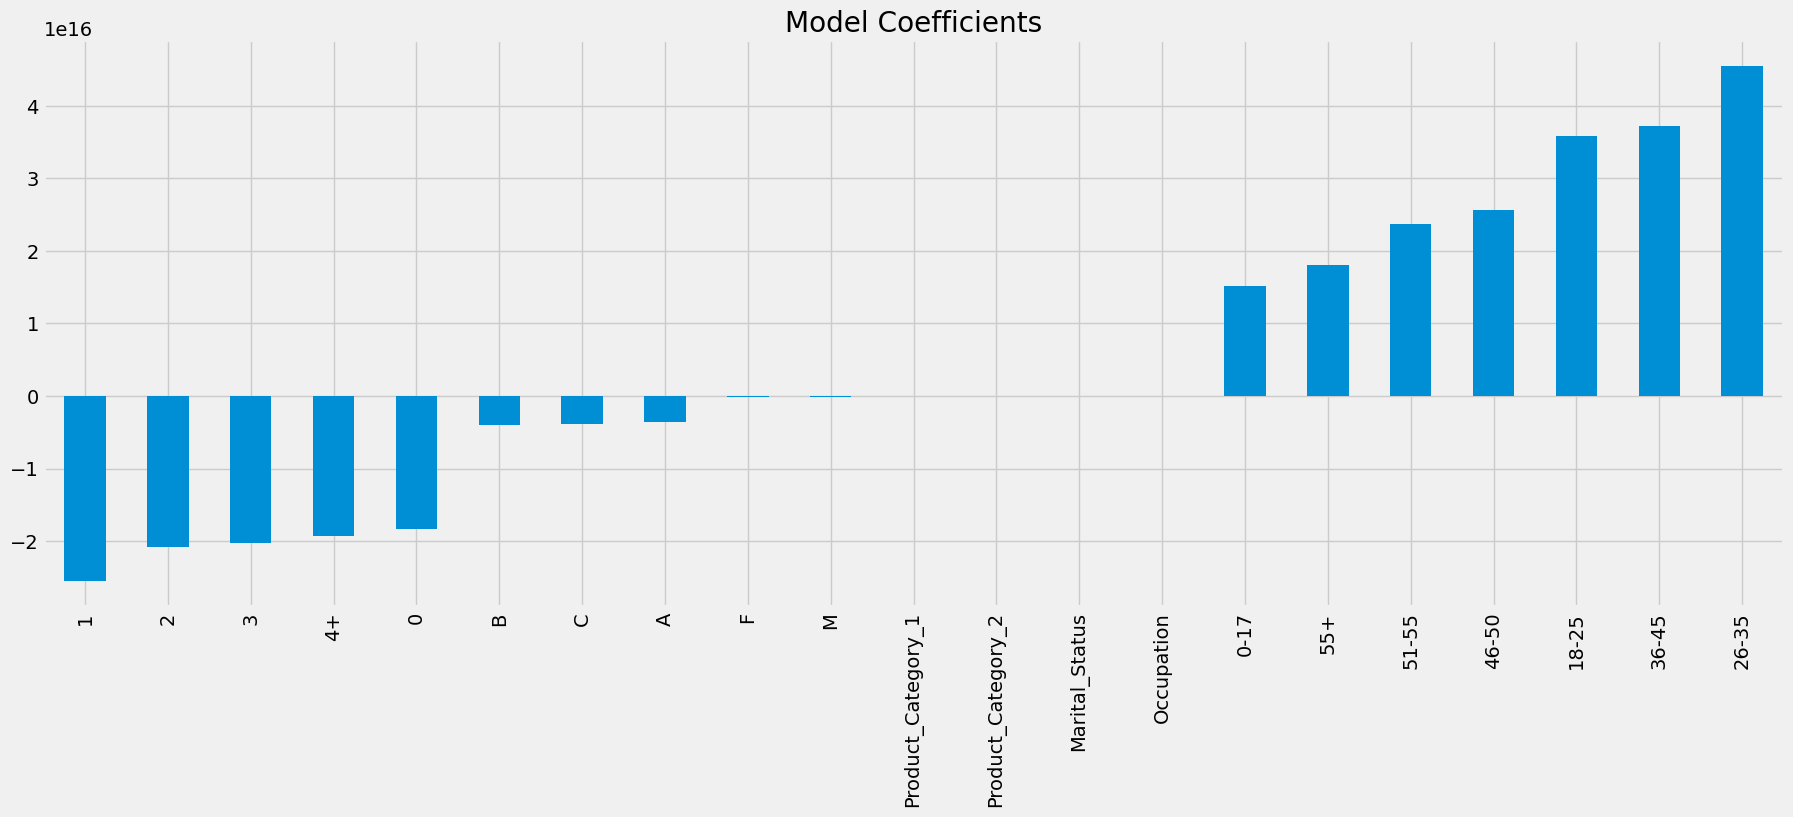

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X_scaled, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Results
MSE: 3174.812752888121
CV Score: 3148.8270732134906


<Axes: title={'center': 'Feature Importance'}>

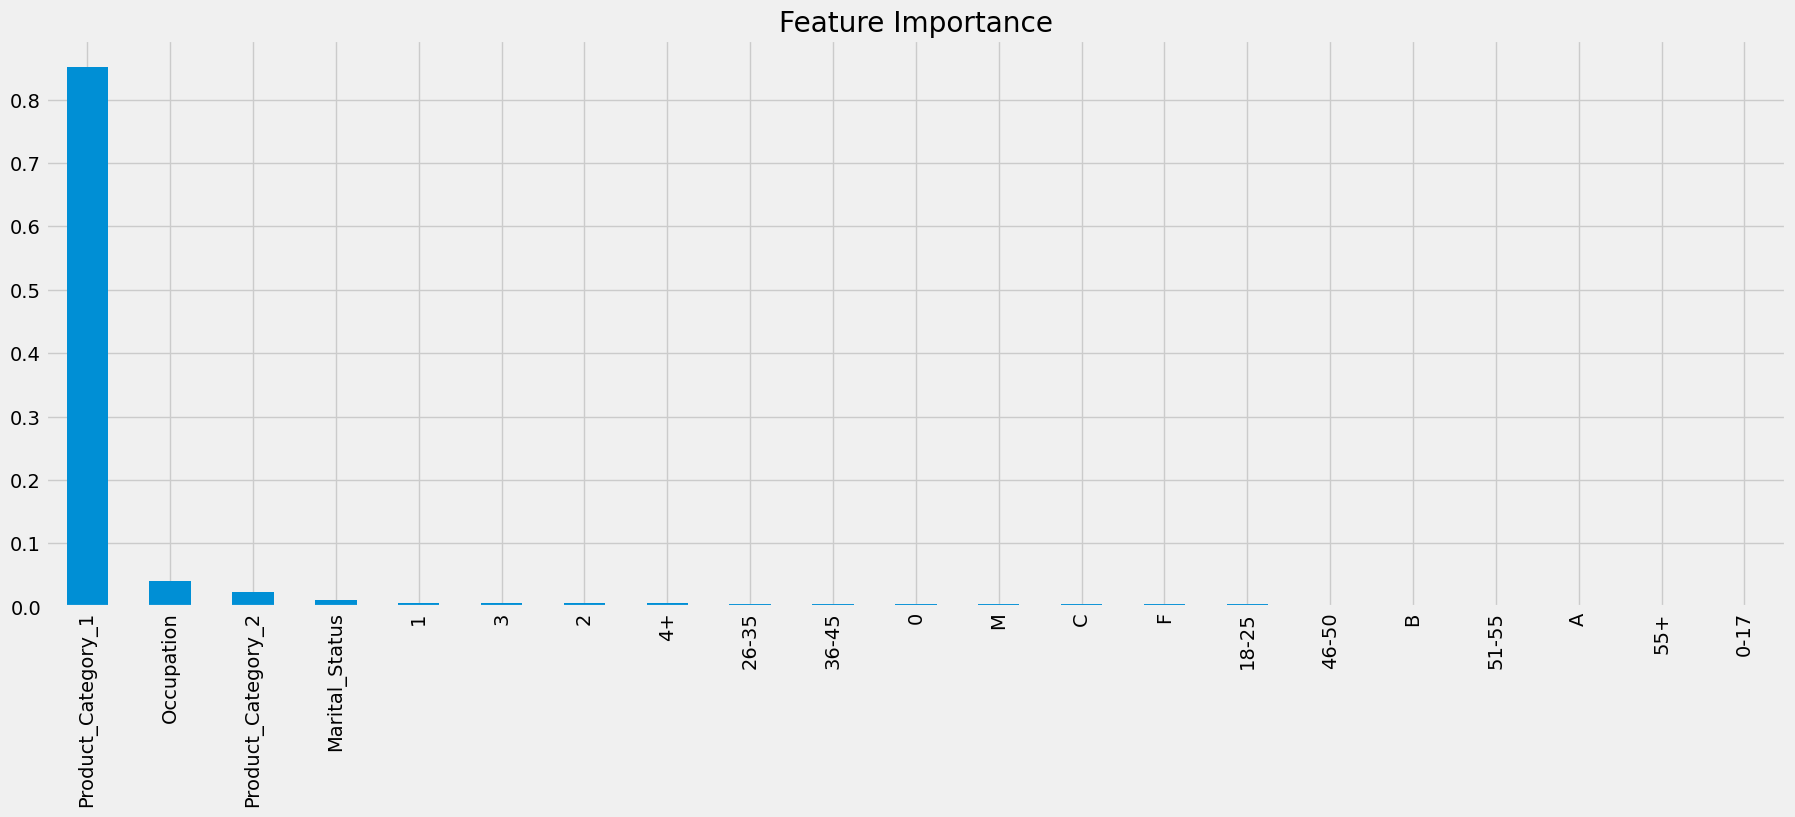

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X_scaled, y)
features = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

Results
MSE: 2927.9455949403214
CV Score: 2920.1173800698043


<Axes: title={'center': 'Feature Importance'}>

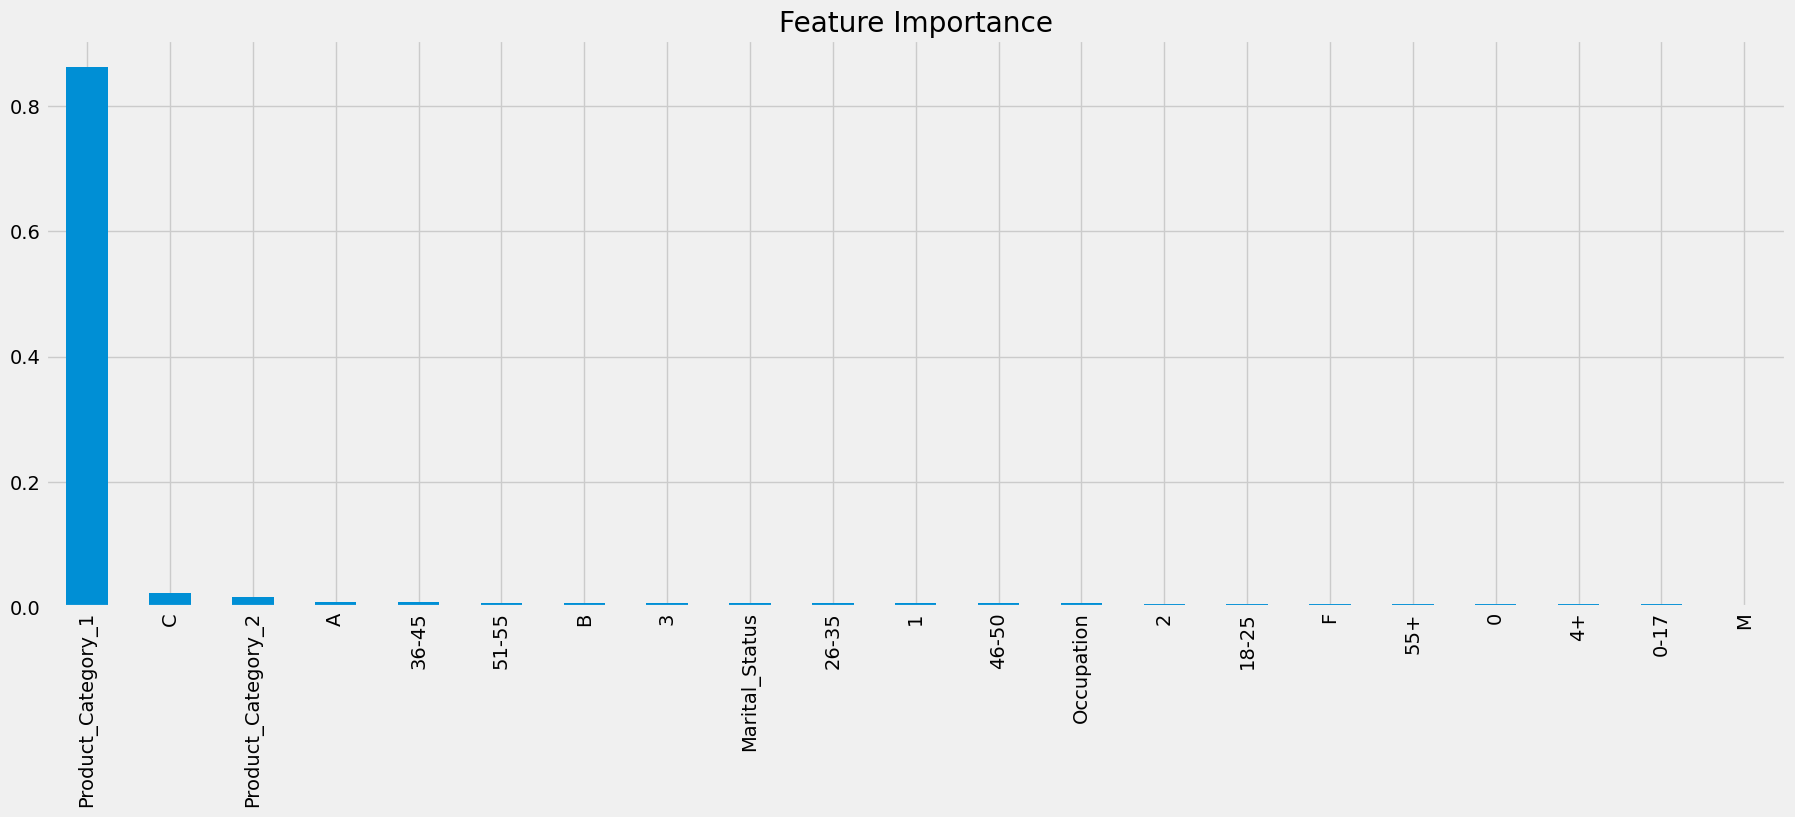

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_jobs=-1, random_state=42)
train(model, X_scaled, y)
features = pd.Series(model.feature_importances_, index=data_final.drop(['Purchase'], axis=1).columns).sort_values(ascending=False)
features.plot(kind='bar', title='Feature Importance')

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           #scoring = 'neg_mean_absolute_error', #MAE
                           scoring = 'neg_mean_squared_error',  #MSE
                           cv = 5,
                           n_jobs = -1,
                           verbose = 3)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [ ]:
hyperParameterTuning(X_scaled, y)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
